## Polynomial Regression: Analytical Solution
Linear regression can be extended to model nonlinear relationships by introducing polynomial terms.


### Engineering Polynomial Features

In [47]:
import numpy as np
import matplotlib.pyplot as plt

In [48]:
def generate_data(n=50, noise=5.0):
    np.random.seed(42)
    X = np.linspace(-10, 10, n)
    # Ground truth line: y = 3x + 8
    true_slope = 3
    true_intercept = 8
    noise = np.random.randn(n) * noise
    y = true_slope * X + true_intercept + noise
    return X, y

X, y = generate_data(n=50, noise=5.0)




In [49]:
# Function to generate polynomial features (input matrix X')
def polynomial_features(X, degree):
    X_poly = np.c_[np.ones(len(X))]
    for i in range(1, degree + 1):
        X_poly = np.c_[X_poly, X**i]
    return X_poly


### Implement Polynomial Regression

In [45]:
def polynomial_regression(X,y,degree):
    X_poly = polynomial_features(X,degree)
    # Closed-form solution: w = (X'^T * X')^-1 * X'^T * y
    w = np.linalg.inv(X_poly.T.dot(X_poly)).dot(X_poly.T).dot(y)
    return w


m = 5  # Degree of the polynomial regression
w_poly = polynomial_regression(X, y, m)  # Parameter vector w

print(f"Parameters (w) for Degree {m}: {w_poly}")

Parameters (w) for Degree 5: [ 5.88112811e+00  3.55957762e+00  3.28108945e-02 -2.15493734e-02
 -6.78082560e-05  1.38175494e-04]


### Visualize the Polynomial Fit

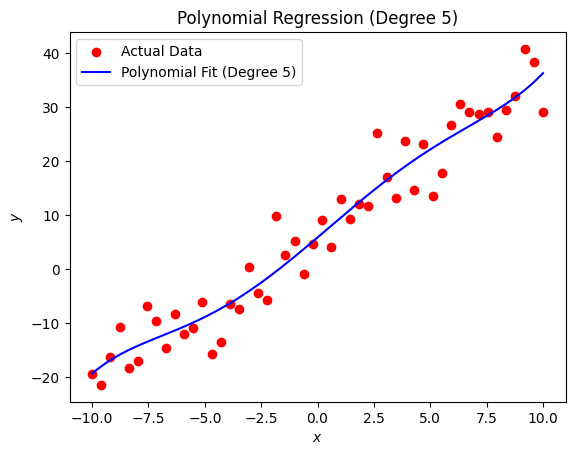

In [52]:
X_fit = np.linspace(X.min(), X.max(), 200)
X_fit_poly = polynomial_features(X_fit, m)
y_poly_pred = X_fit_poly.dot(w_poly)

# Plot the actual data and the polynomial fit
plt.scatter(X, y, color='red', label='Actual Data')
plt.plot(X_fit, y_poly_pred, color='blue', label=f'Polynomial Fit (Degree {m})')
plt.title(f"Polynomial Regression (Degree {m})")
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.legend()
plt.show()